In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import sidetable as stb
import numpy as np
import seaborn as sns
from scipy import stats

In [88]:
datos_crudos = pd.read_csv('games.csv')

In [89]:
def EDA(datos):
    print(datos.head())
    print()
    print(datos.info())
    print()
    print('Filas duplicadas: \n', datos.duplicated().sum())
    print()
    print('Columnas con valores ausentes: \n',datos.isna().sum())
    

In [90]:
EDA(datos_crudos)

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11

In [91]:
datos_crudos.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


In [92]:
datos_crudos.columns = datos_crudos.columns.str.lower()

In [93]:
datos_crudos.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [94]:
datos_crudos['name'].fillna('Desconocido', inplace=True)
datos_crudos['genre'].fillna('Desconocido', inplace=True)

In [95]:
datos_crudos['year_of_release'] = datos_crudos['year_of_release'].fillna(0).astype('int')

In [96]:
datos_crudos['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [97]:
datos_crudos.loc[datos_crudos['user_score'] == 'tbd','user_score'] = np.nan

In [98]:
datos_crudos['user_score'] = datos_crudos['user_score'].astype('float')

In [99]:
datos_crudos.stb.missing(style=True)

,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
name,0,"16,715",0.00%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
genre,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


In [100]:
datos_crudos['user_score'].fillna(-1, inplace=True)
datos_crudos['critic_score'].fillna(-1, inplace=True)

In [101]:
datos_crudos.stb.missing(style=True)

,missing,total,percent
rating,"6,766","16,715",40.48%
name,0,"16,715",0.00%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
genre,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%
other_sales,0,"16,715",0.00%
critic_score,0,"16,715",0.00%


In [102]:
datos_crudos['rating'].fillna('Desconocido', inplace=True)

In [103]:
datos_crudos.stb.missing(style=True)

,missing,total,percent
name,0,"16,715",0.00%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
genre,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%
other_sales,0,"16,715",0.00%
critic_score,0,"16,715",0.00%
user_score,0,"16,715",0.00%


In [104]:
datos_crudos['ventas_totales'] = datos_crudos[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [105]:
datos_crudos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Desconocido,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Desconocido,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Desconocido,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,Desconocido,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Desconocido,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,Desconocido,0.01


In [106]:
juego_por_anio = datos_crudos.groupby('year_of_release').count()['name'].sort_values().reset_index()

In [107]:
juego_por_anio = juego_por_anio.query('year_of_release != 0')
juego_por_anio.columns = ['year_of_release', 'total_games']

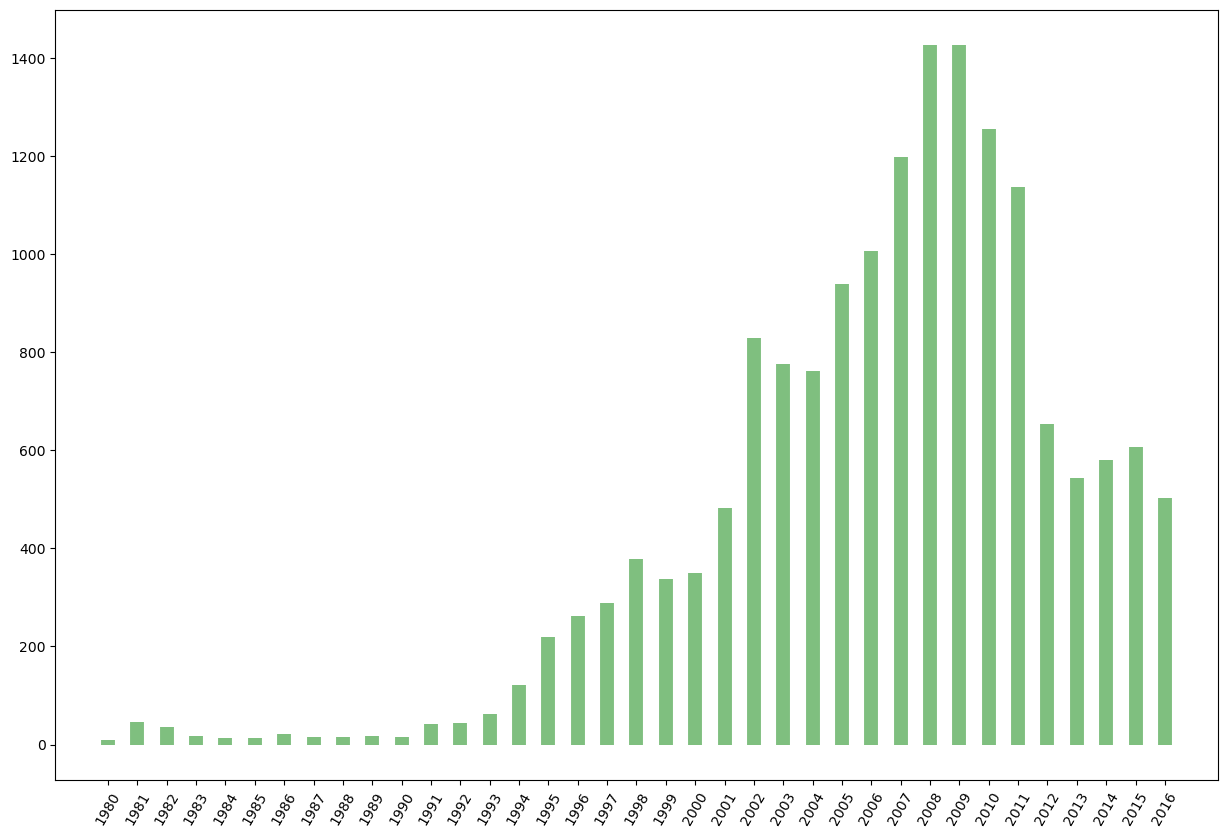

In [108]:
fig, ax = plt.subplots(figsize=(15,10))
ax.vlines(x=juego_por_anio.year_of_release, ymin=0, ymax=juego_por_anio.total_games, alpha=0.5, linewidth=10, color='green')
ax.set_xticks(juego_por_anio.year_of_release)
ax.set_xticklabels(juego_por_anio.year_of_release, rotation=60)
plt.show()

In [109]:
df_sales = datos_crudos.groupby('platform')['ventas_totales'].sum()

In [110]:
df_sales = df_sales.sort_values(ascending=False).reset_index()

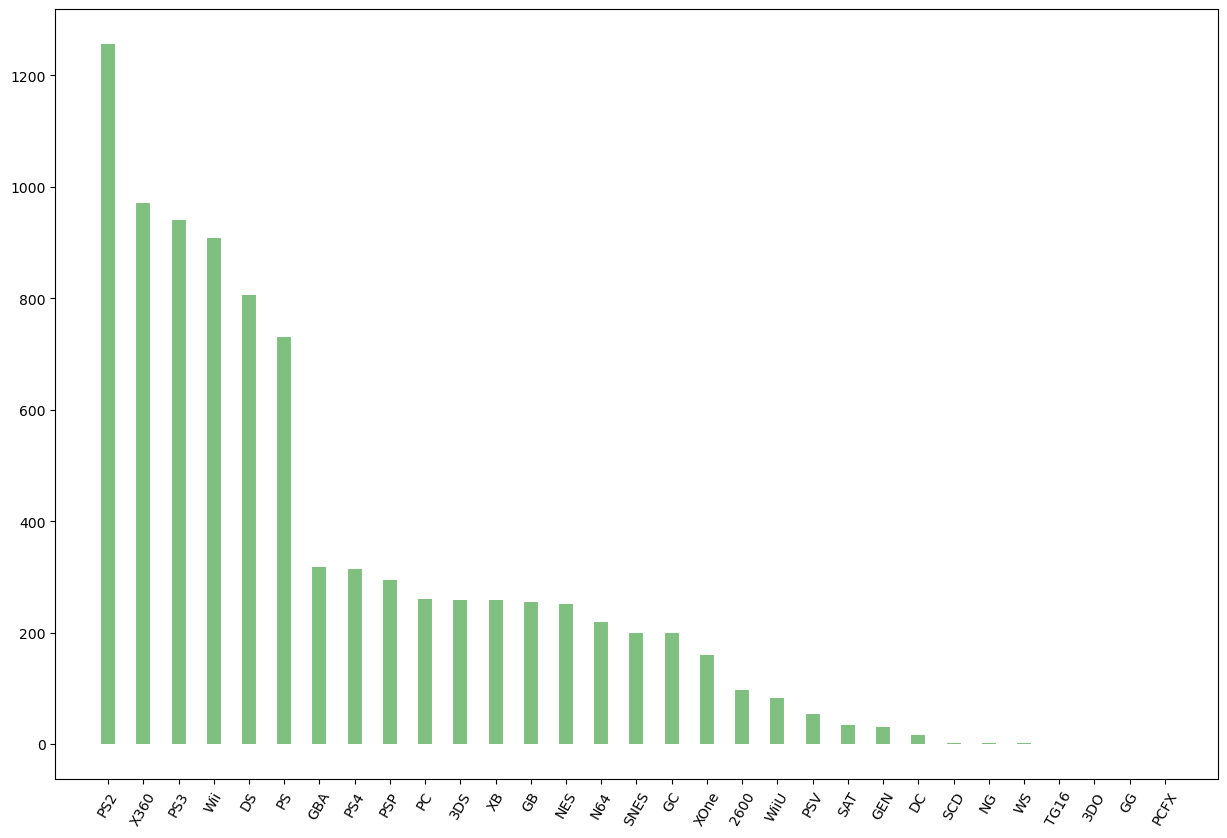

In [111]:
fig, ax = plt.subplots(figsize=(15,10))
ax.vlines(x=df_sales.platform, ymin=0, ymax=df_sales.ventas_totales, alpha=0.5, linewidth=10, color='green')
ax.set_xticks(df_sales.platform)
ax.set_xticklabels(df_sales.platform, rotation=60)
plt.show()

In [112]:
df_sales['z_score'] = (df_sales['ventas_totales'] - df_sales['ventas_totales'].mean())/df_sales['ventas_totales'].std()

In [115]:
df_sales['color'] = [ 'red' if puntaje < 0 else 'green' for puntaje in df_sales['z_score']]

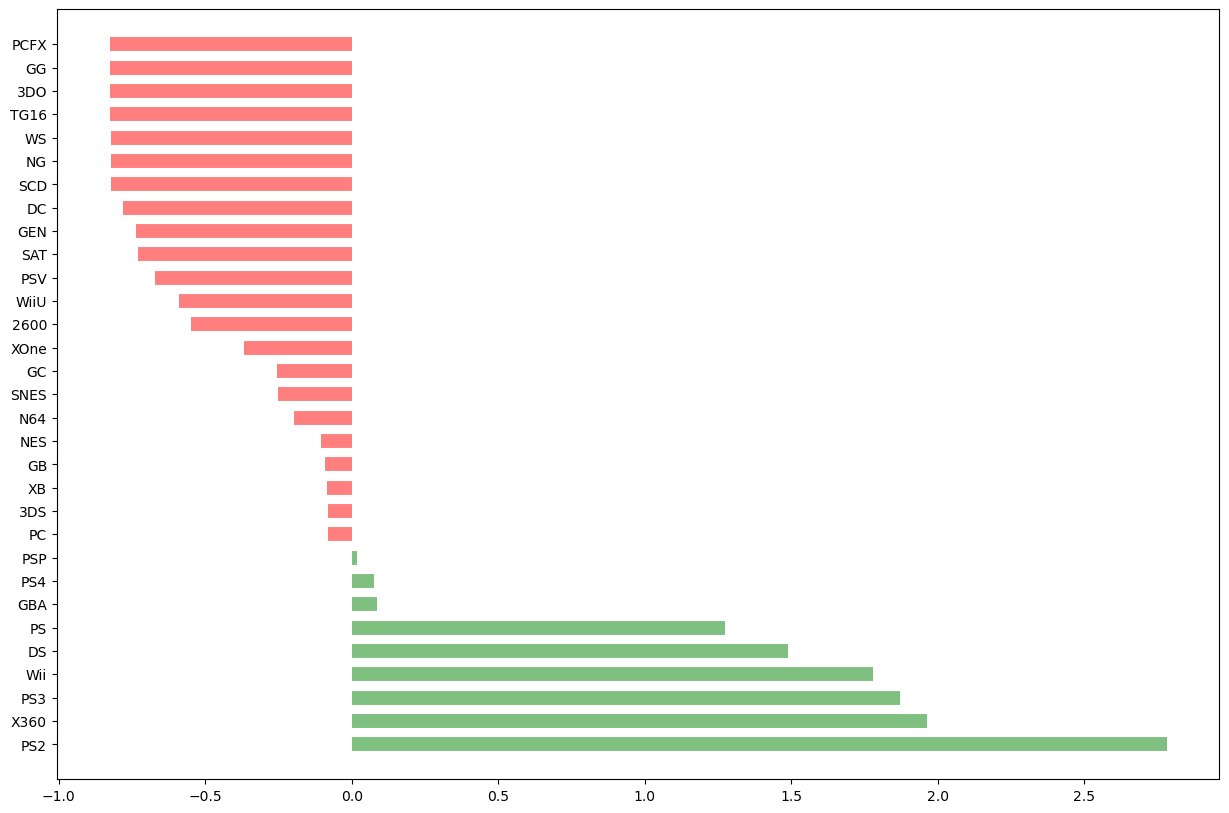

In [117]:
plt.figure(figsize=(15,10))
plt.hlines(
    y=df_sales.platform, xmax=df_sales.z_score, xmin=0, linewidth=10, alpha=0.5, color=df_sales.color
)
plt.show()

In [120]:
df_tiempo_de_vida = datos_crudos.pivot_table(
    index='year_of_release', columns='platform', values='ventas_totales', aggfunc='sum'
).fillna(0)

In [124]:
df_tiempo_de_vida = df_tiempo_de_vida.iloc[1:, :]

/Users/erickandrenaunay/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erickandrenaunay/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


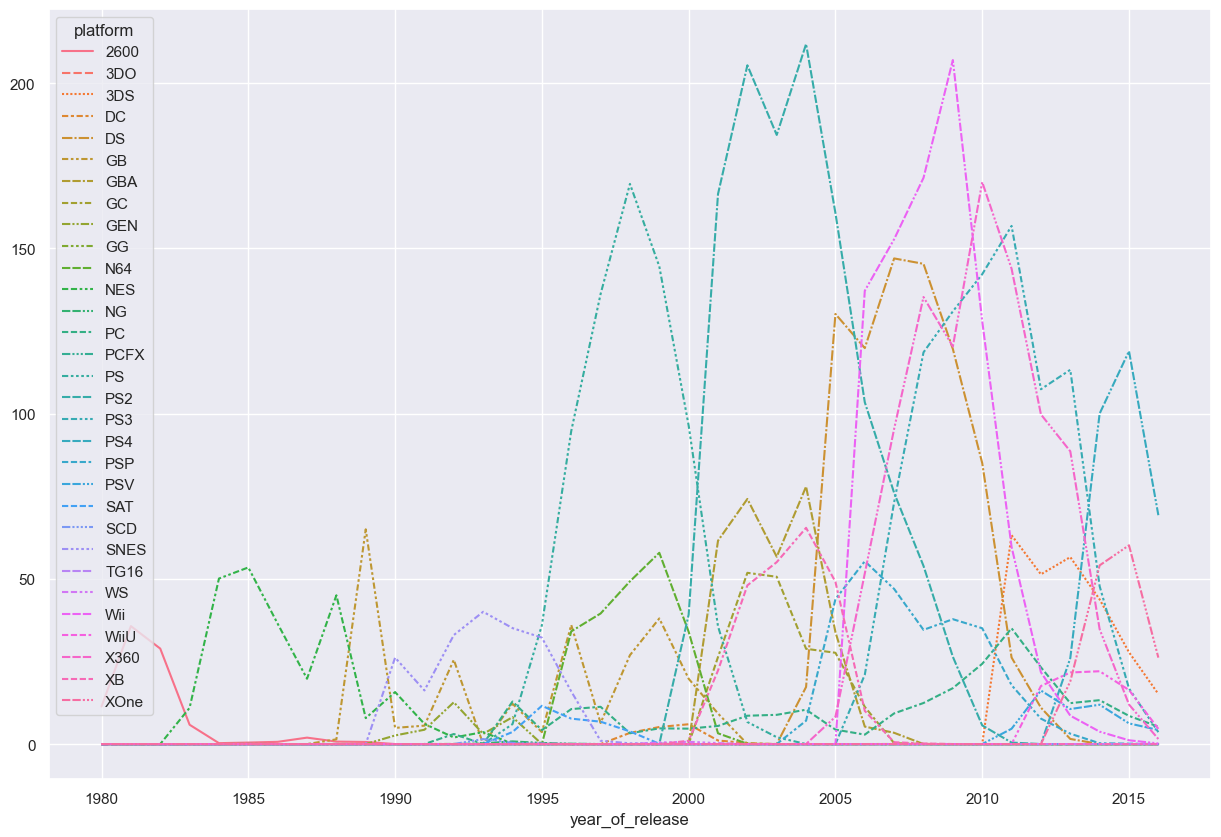

In [125]:
sns.set(rc={'figure.figsize': (15,10)})
sns.lineplot(data=df_tiempo_de_vida)
plt.show()

In [130]:
clean_data = datos_crudos[datos_crudos.year_of_release >= 2005]

In [131]:
df_tiempo_de_vida = clean_data.pivot_table(
    index='year_of_release', columns='platform', values='ventas_totales', aggfunc='sum'
).fillna(0)

/Users/erickandrenaunay/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erickandrenaunay/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


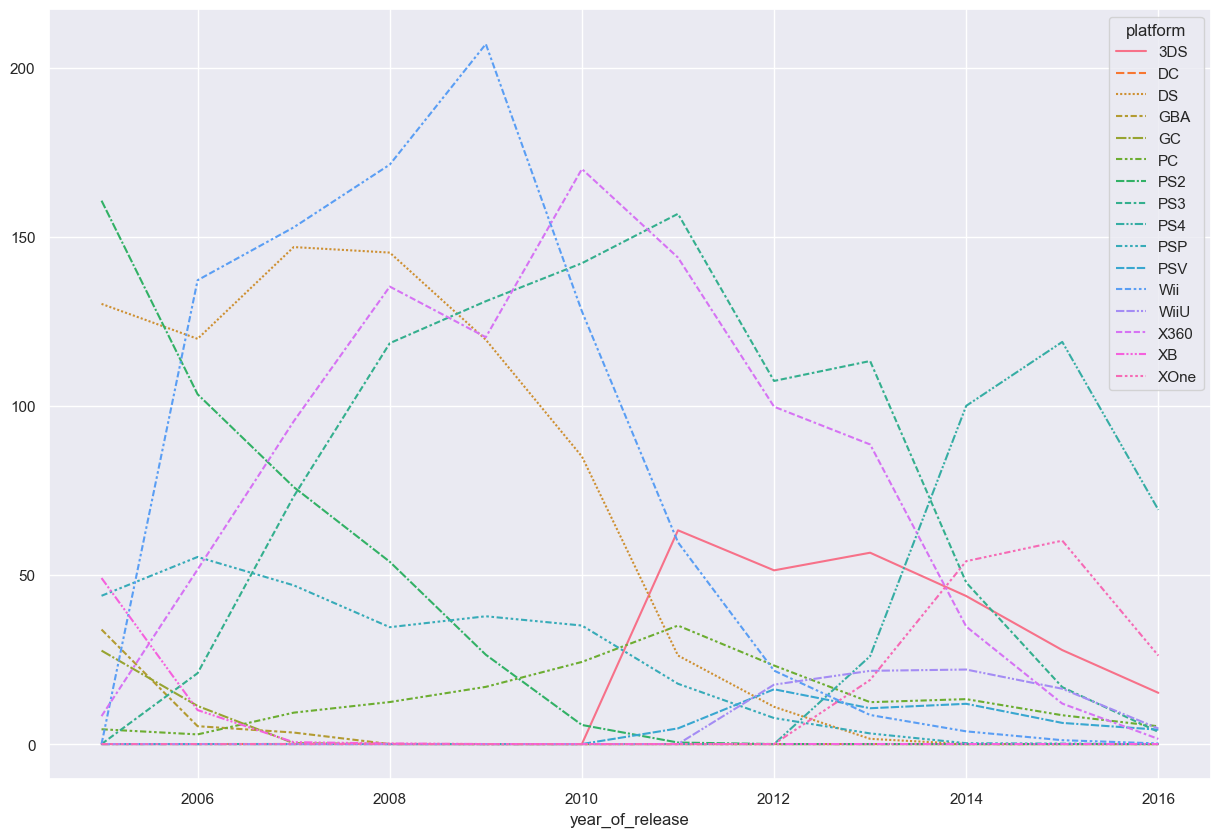

In [132]:
sns.set(rc={'figure.figsize': (15,10)})
sns.lineplot(data=df_tiempo_de_vida)
plt.show()

Hipotesis 1: El promedio de los puntajes de los usuarios a los juegos de la plataforma X1 son iguales a los de la PC

In [135]:
hyp_data = clean_data.query('user_score > 0 & (platform == "XOne" or platform == "PC")')

/Users/erickandrenaunay/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


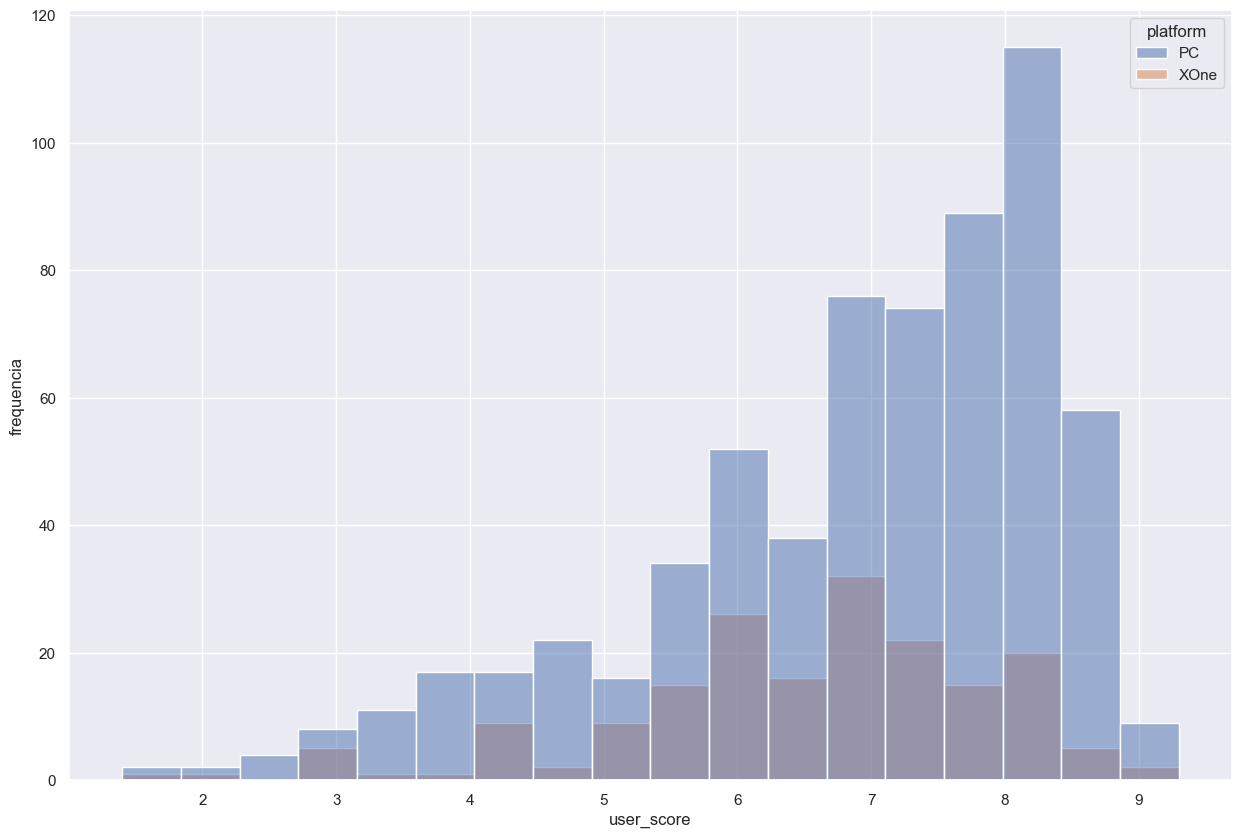

In [136]:
sns.histplot(hyp_data, x='user_score', hue='platform')
plt.ylabel('frequencia')
plt.xlabel('user_score')
plt.show()

In [137]:
hyp_data.groupby('platform')['user_score'].mean()

platform
PC      6.884938
XOne    6.521429
Name: user_score, dtype: float64

H0: Las diferencias entre el promedio de score de usuarios al x1 y pc NO son estadisticamente significativas, es decir son iguales


H1: Las diferencias entre el promedio de score de usuarios al x1 y pc son estadisticamente significativas, es decir son diferentes

In [142]:
xone = hyp_data.query('platform == "XOne"')
pc = hyp_data.query('platform == "PC"')

In [140]:
nivel_de_confianza = 0.95
alpha = 1 - nivel_de_confianza

H0: La variance de los de x1 es diferente a la varianza de los de la PC

H1: La variance de los de x1 es igual a la varianza de los de la PC

In [145]:
p_value_levene = stats.levene(
    xone['user_score'], pc['user_score']
).pvalue

if p_value_levene < alpha:
    print('se rechaza la H0: la varianza de x1 no es igual a la varianza de pc')
else:
    print('no se puede rechazar la h0: no hay evidencia suficiente para decir que las varianzas de x1 y pc no son iguales')

no se puede rechazar la h0: no hay evidencia suficiente para decir que las varianzas de x1 y pc no son iguales
